## Sales Data Analysis
Understanding sales trends and customer purchasing behavior is essential for optimizing business performance and maximizing revenue. This analysis explores key sales metrics, customer demographics and product performance to uncover valuable insights.This study aims to highlight opportunities for growth and strategic decision-making by identifying top-selling items, high-revenue brands and customer preferences based on gender and age.
The findings from this analysis will support data-driven decision-making to enhance overall sales performance.
### Objectives
* **Basic Insights**

Top 5 best-selling items (based on volumes).

Top 3 brands contributing the highest revenue.

Day of the week with the highest sales volume.
* **Customer Analysis:**

Gender-wise and age-wise distribution of customers.

Identify the most popular category among each gender and age group.
* **Advanced Analysis:**

Calculate the Average Basket Value per customer and identify any patterns.

Identify customer segments that generate the highest revenue (e.g., age group, gender, or category preference).

The dataset contains the following columns:
* **TRANSDATE:** Date of transaction
* **RECEIPTID:** Unique identifier for each transaction
* **ITEMNAME:** Name of the purchased item
* **DEPARTMENT, CATEGORY, FINELINE:** Hierarchical categorization of items
* **BRAND:** Brand name of the item
* **QTY:** Quantity purchased
* **NETAMOUNTINCLTAX:** Total transaction amount, including tax
* **PRICE:** Price per unit
* **CUSTOMERACC:** Unique identifier for customers
* **GENDER:** Gender of the customer
* **AGE:** Age of the customer"


In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing dataset
df =pd.read_excel("Sales_Dataset.xlsx")

### Data Processing

In [3]:
display(df.head())
print("===" * 20)
print(f"Dataset shape: {df.shape}")
print("===" * 20)
print(f"Missing values present: {df.isna().any()}")
print("===" * 20)
print(f"Data types: {df.dtypes}")

,TRANSDATE,RECEIPTID,ITEMNAME,DEPARTMENT,CATEGORY,FINELINE,BRAND,QTY,NETAMOUNTINCLTAX,PRICE,CUSTOMERACC,GENDER,AGE
0,39656,298-01142,SOKO MAIZE MEAL 5KG,FLOUR,MAIZE FLOUR,STANDARD MAIZE FLOUR,SOKO,1.0,253.0,253,CD-966516,F,18 -28
1,39656,298-01204,BELLA WHITE T/PAPER 10PACK,PAPER + PLASTICS,TISSUE PAPERS,BLENDED,BELLA,1.0,199.0,199,CD-169085,F,29 -39
2,39655,298-01015,BELLA WHITE T/PAPER 4 PACK,PAPER + PLASTICS,TISSUE PAPERS,BLENDED,BELLA,3.0,207.0,69,CD-822352,F,40 -50
3,39656,298-01269,KENPOLY MUG 330,KITCHEN AND DINING,TABLEWARES,DRINKWARES,KENPOLY,1.0,32.0,32,CD-207673,F,40 -50
4,39650,298-00091,BELLA WHITE T/PAPER 4 PACK,PAPER + PLASTICS,TISSUE PAPERS,BLENDED,BELLA,2.0,138.0,69,CD-936825,M,29 -39


Dataset shape: (1515, 13)
Missing values present: TRANSDATE           False
RECEIPTID           False
ITEMNAME            False
DEPARTMENT          False
CATEGORY            False
FINELINE            False
BRAND               False
QTY                 False
NETAMOUNTINCLTAX    False
PRICE               False
CUSTOMERACC         False
GENDER              False
AGE                 False
dtype: bool
Data types: TRANSDATE             int64
RECEIPTID            object
ITEMNAME             object
DEPARTMENT           object
CATEGORY             object
FINELINE             object
BRAND                object
QTY                 float64
NETAMOUNTINCLTAX    float64
PRICE                 int64
CUSTOMERACC          object
GENDER               object
AGE                  object
dtype: object


* Renaming the columns

In [4]:
df.columns =[
    "Date",
    "Receipt ID",
    "Item",
    "Department",
    "Category",
    "Fineline",
    "Brand",
    "Quantity",
    "Total Sales",
    "Price per Quantity",
    "Customer Account",
    "Gender",
    "Age"
]

####  Change the date column to Datetime
The Date column is stored as an Excel serial date instead of a proper date format and since pd.read_excel() doesn't always automatically recognize Excel serial dates as proper datetime objects, it will not be parsed correctly.

In [5]:
#changing the data type
df["Date"] =pd.to_datetime(df["Date"],origin="1899-12-30",unit="D")
print(f"\nEarliest Date: {df["Date"].max()}")
print(f"\nLatest Date: {df["Date"].min()}")


Earliest Date: 2008-07-27 00:00:00

Latest Date: 2008-07-21 00:00:00


* Lets extract the days from the Date column

In [6]:
#Extracting the days
df["Day"] =df["Date"].dt.day_name()

In [7]:
df.columns

Index(['Date', 'Receipt ID', 'Item', 'Department', 'Category', 'Fineline',
       'Brand', 'Quantity', 'Total Sales', 'Price per Quantity',
       'Customer Account', 'Gender', 'Age', 'Day'],
      dtype='object')

In [8]:
cols =["Receipt ID","Item","Department","Category","Fineline","Brand","Customer Account"]
for col in cols:
    unique =df[col].nunique()
    print(f"\nUnique numbers of {col} is {unique}")


Unique numbers of Receipt ID is 156

Unique numbers of Item is 911

Unique numbers of Department is 44

Unique numbers of Category is 134

Unique numbers of Fineline is 250

Unique numbers of Brand is 356

Unique numbers of Customer Account is 147


In [9]:
cols =["Gender","Age","Day"]
for col in cols:
    unique =df[col].unique()
    print(f"\nUnique values of {col} are {unique}")


Unique values of Gender are ['F' 'M']

Unique values of Age are ['18 -28' '29 -39' '40 -50' '51 -61' '73 -83' '62 -72']

Unique values of Day are ['Sunday' 'Saturday' 'Monday' 'Friday']


* For the Gender column lets rename its values
* For the Age column, lets change it to categorical and ordered

In [10]:
#replacing the values of Gender column
df["Gender"] =df["Gender"].replace({"F":"Female","M":"Male"})

#Changing the data type of Age column
orders =["18 -28","29 -39","40 -50","51 -61","62 -72","73 -83"]
df["Age"] =pd.Categorical(df["Age"],categories=orders,ordered=True)

cols =["Gender","Age"]
for col in cols:
    unique =df[col].unique()
    print(f"\nUnique values of {col} are {unique}")


Unique values of Gender are ['Female' 'Male']

Unique values of Age are ['18 -28', '29 -39', '40 -50', '51 -61', '73 -83', '62 -72']
Categories (6, object): ['18 -28' < '29 -39' < '40 -50' < '51 -61' < '62 -72' < '73 -83']


In [11]:
#saving the tidy dataset
df.to_csv(r"C:\Users\USER\Desktop\My Work\Sales Analysis\Tidy Sales Dataset.csv")

## Exploratory Data Analysis

In [12]:
#Calculating Total Customers
total_customers=df["Customer Account"].nunique()

#Calculate Total Sales
total_sales =int(df["Total Sales"].sum())

#Calculating Total Transactions
total_transactions = df["Receipt ID"].nunique()

# Calculating Average Basket Value
abv=total_sales / total_transactions

print(f"\nTotal Customers: {total_customers}")
print(f"\nTotal Revenue : Ksh.{total_sales}")
print(f"\nAverage Basket Value: Ksh.{int(abv)}")


Total Customers: 147

Total Revenue : Ksh.322964

Average Basket Value: Ksh.2070


### Daily Sales Trend

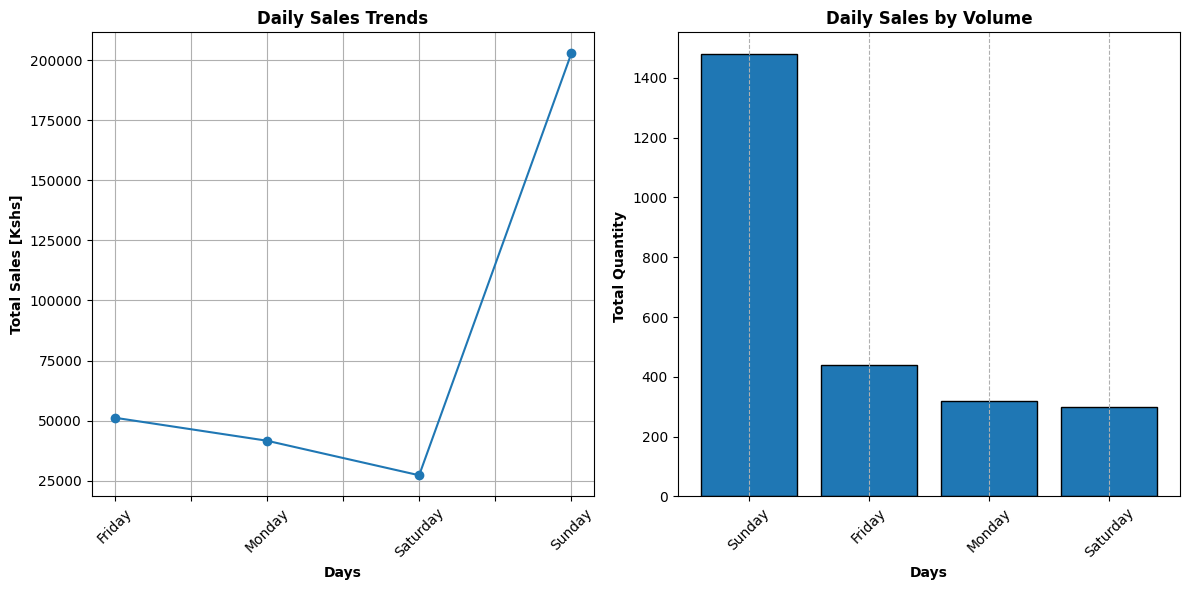

In [13]:
#Plotting the daily sales trends
daily_sales =df.groupby("Day")["Total Sales"].sum()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
#sns.set_style("whitegrid")
daily_sales.plot(kind="line",marker="o",ax=ax1)
ax1.set_title("Daily Sales Trends",fontweight="bold")
ax1.set_ylabel("Total Sales [Kshs]",fontweight="bold")
ax1.set_xlabel("Days",fontweight="bold")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.grid(True)


daily_saless=df.groupby("Day")["Quantity"].sum().reset_index().sort_values(by="Quantity",ascending=False)
ax2.bar(daily_saless["Day"],daily_saless["Quantity"],edgecolor="black")
ax2.set_title("Daily Sales by Volume",fontweight="bold")
ax2.set_ylabel("Total Quantity ",fontweight="bold")
ax2.set_xlabel("Days",fontweight="bold")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.grid(axis="x",linestyle="--")
plt.show()

In [14]:
best_day=daily_sales.idxmax()
worst_day=daily_sales.idxmin()
print(f"\n{best_day} is when the sales are high.")
print(f"\n{worst_day} is when the sales are low.")


Sunday is when the sales are high.

Saturday is when the sales are low.


### Top 10 Groups

In [15]:
def plot(df,column):
    top_items_qty=df.groupby(column)["Quantity"].sum().reset_index().sort_values(by="Quantity",ascending=False).head(10)
    top_items_sales=df.groupby(column)["Total Sales"].sum().reset_index().sort_values(by="Total Sales",ascending=False).head(10)
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
    ax1.barh(top_items_qty[column],top_items_qty["Quantity"],color="teal",edgecolor="black")
    ax1.set_title(f"Top 10 {column} by Quantity",fontweight="bold")
    ax1.set_xlabel("Total Quantity",fontweight="bold")
    ax1.invert_yaxis()
    ax1.grid(axis="x",linestyle="--")

    ax2.barh(top_items_sales[column],top_items_sales["Total Sales"],color="steelblue",edgecolor="black")
    ax2.set_title(f"Top 10 {column} by Total Sales",fontweight="bold")
    ax2.set_xlabel("Total Sales",fontweight="bold")
    ax2.invert_yaxis()
    plt.tight_layout()
    ax2.grid(axis="x",linestyle="--")
    plt.show()

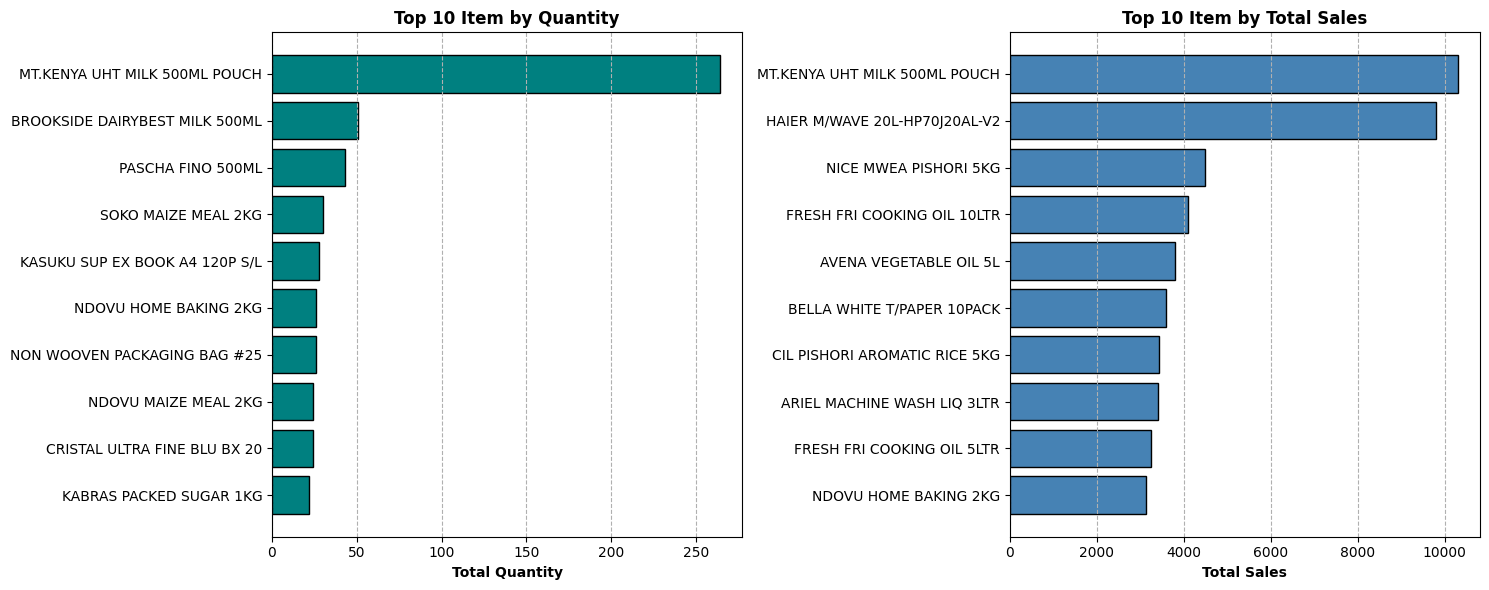

In [16]:
plot(df,"Item")

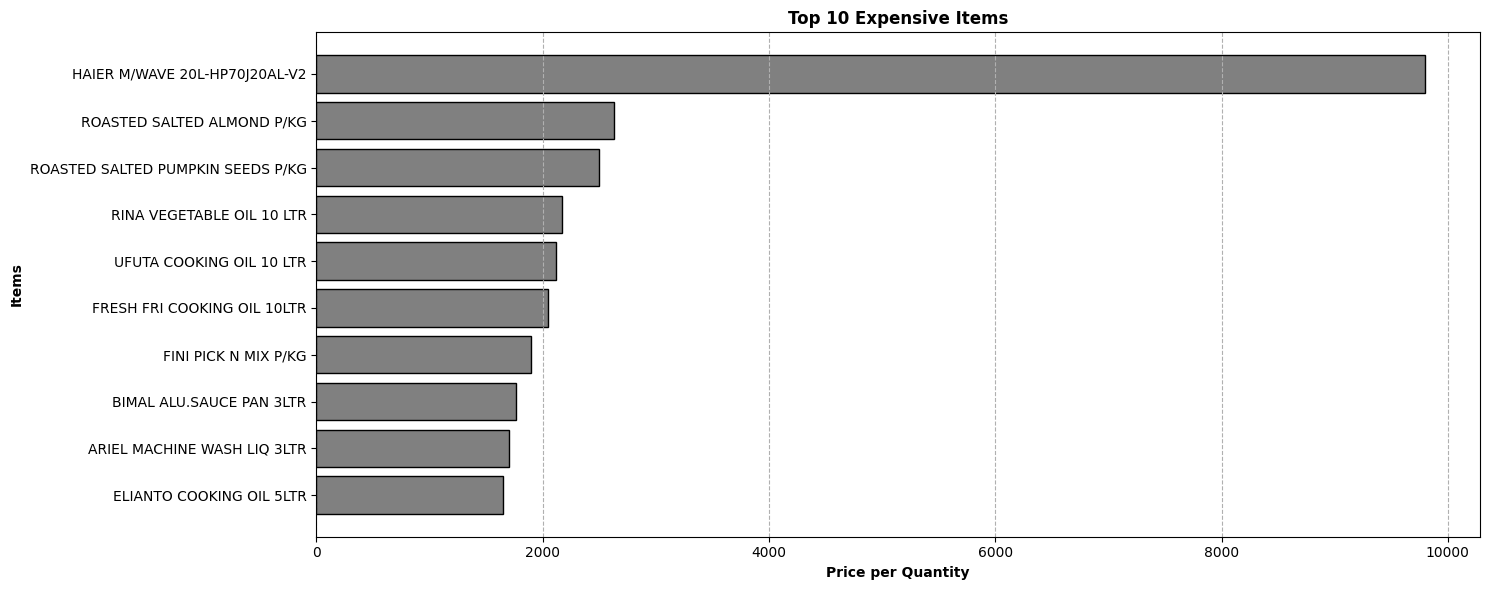

In [17]:
expensive_items = df.groupby("Item")["Price per Quantity"].mean().reset_index().sort_values(by="Price per Quantity",ascending=False).head(10)
fig,(ax)=plt.subplots(figsize=(15,6))
ax.barh(expensive_items["Item"],expensive_items["Price per Quantity"],color="gray",edgecolor="black")
ax.set_title("Top 10 Expensive Items",fontweight="bold")
ax.set_ylabel("Items",fontweight="bold")
ax.set_xlabel("Price per Quantity",fontweight="bold")
ax.invert_yaxis()
plt.tight_layout()
plt.grid(axis="x",linestyle="--")
plt.show()

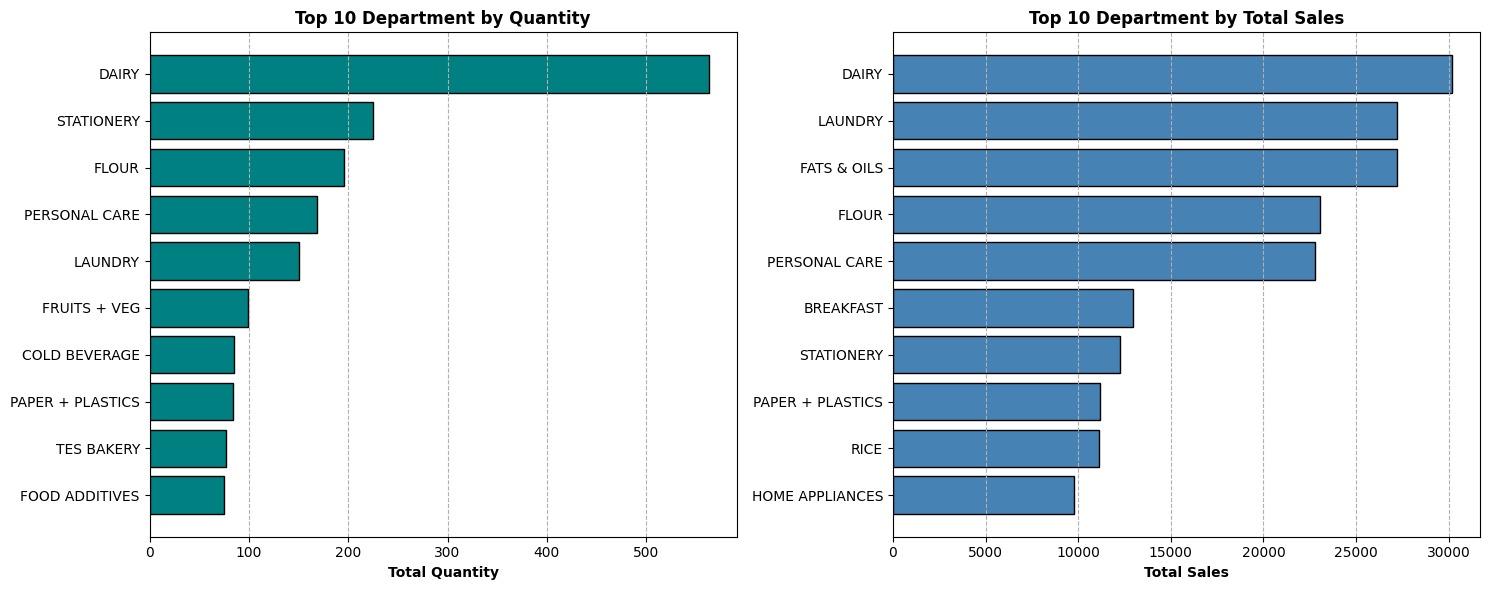

In [18]:
plot(df,"Department")

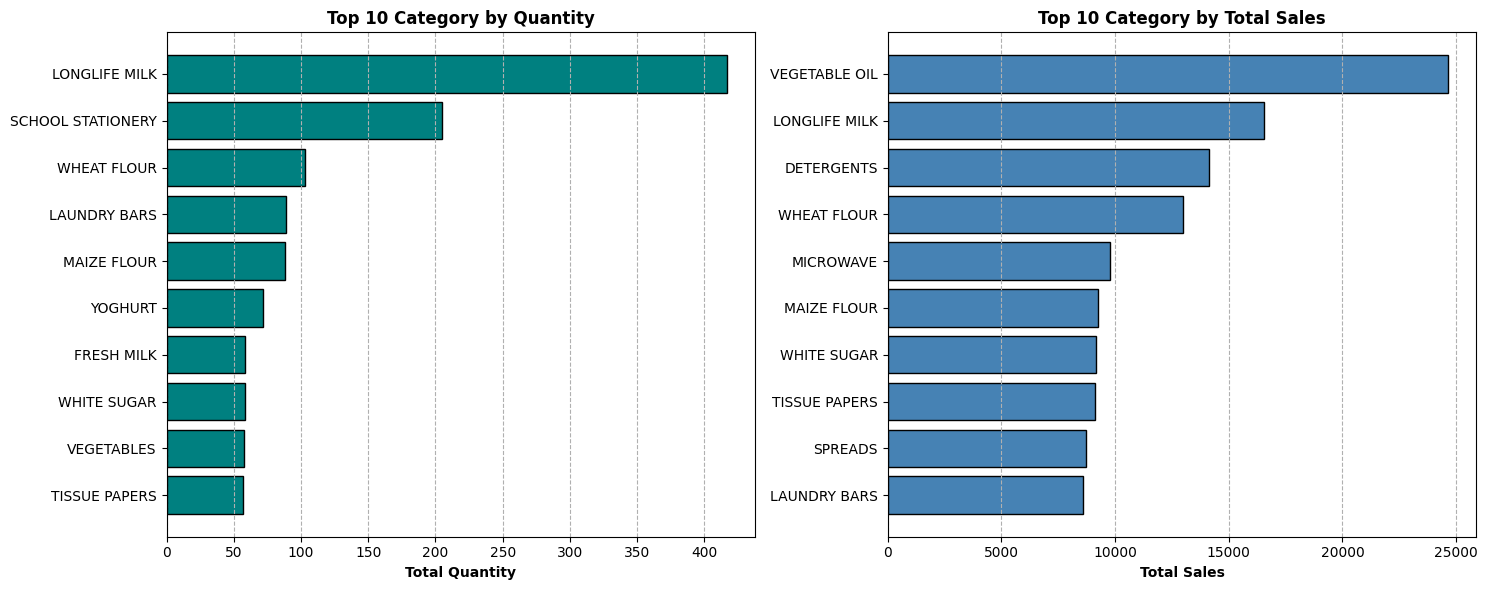

In [19]:
plot(df,"Category")

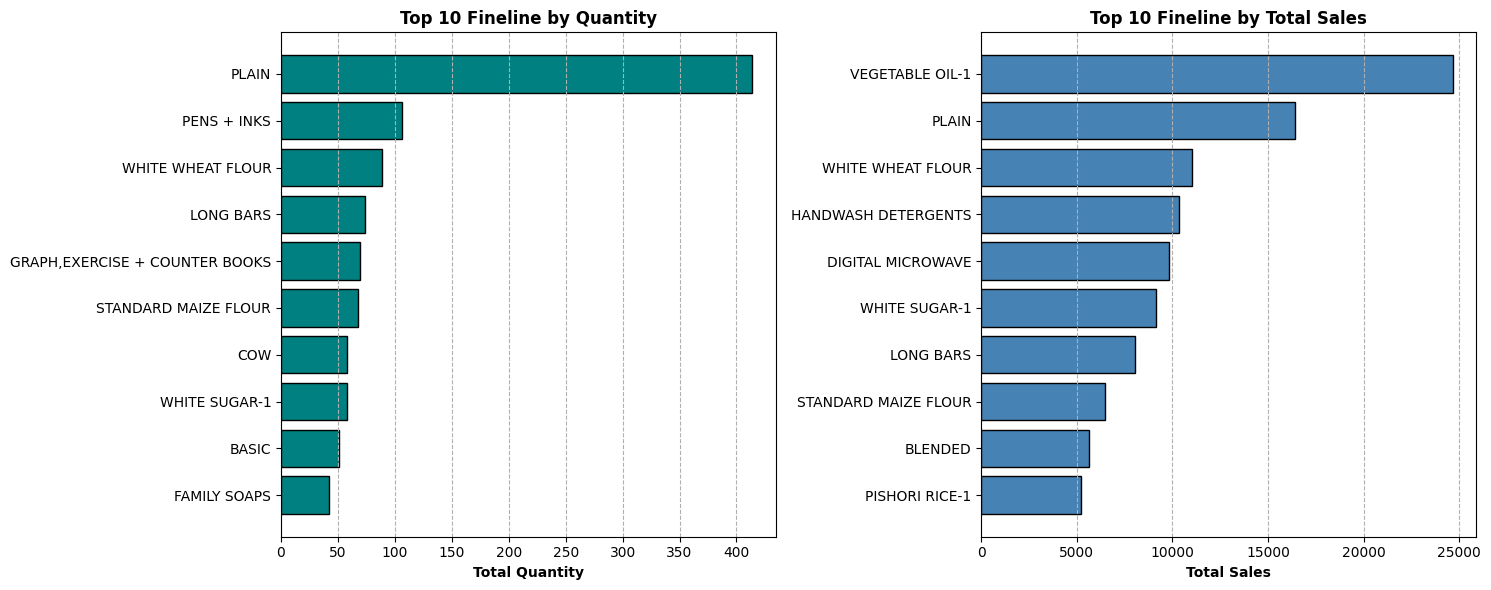

In [20]:
plot(df,"Fineline")

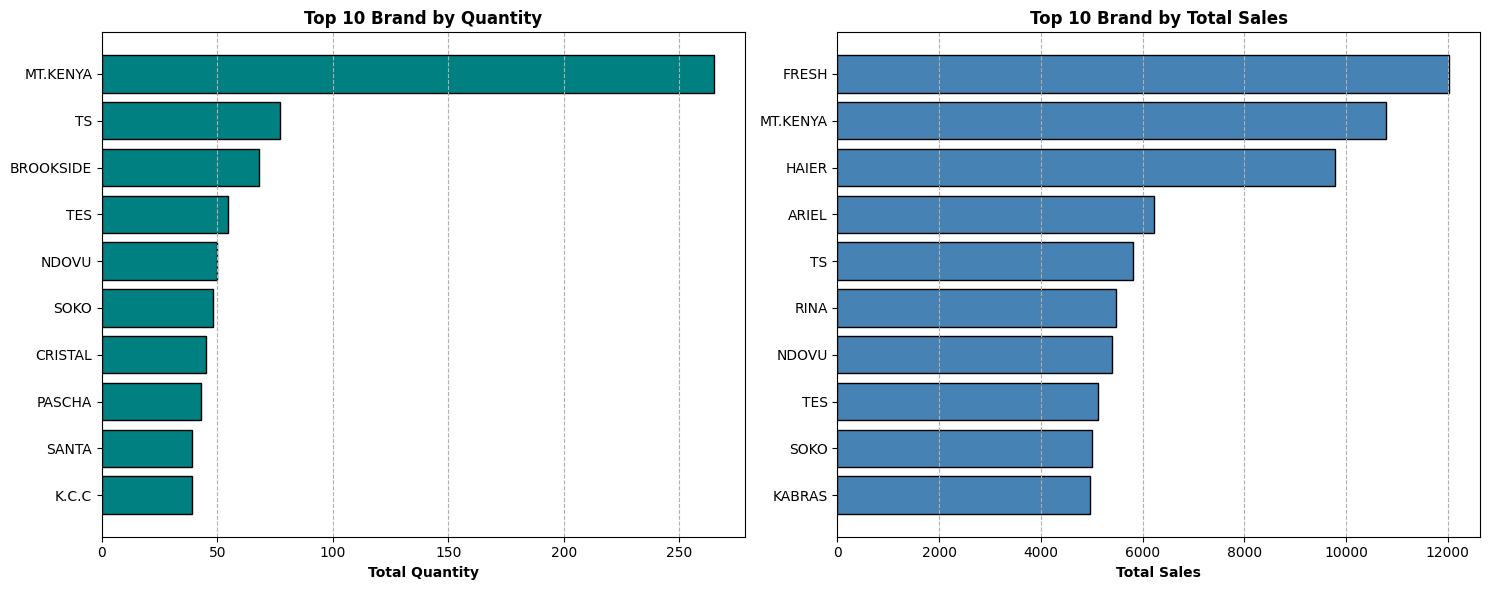

In [21]:
plot(df,"Brand")

#### Customer Demographics Analysis

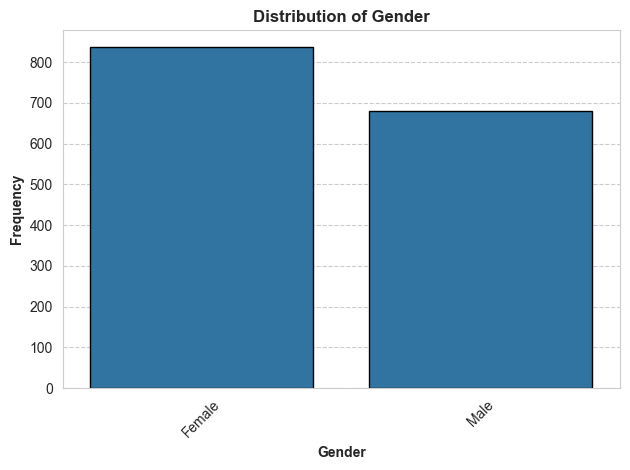

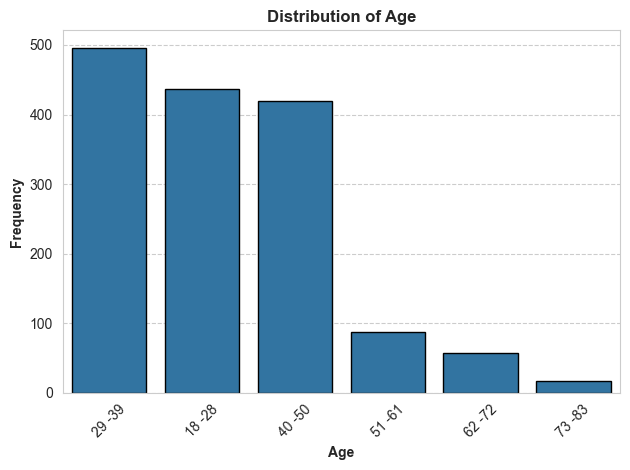

In [22]:
def count(df,column):
    sns.set_style("whitegrid")
    count =df[column].value_counts(ascending=False)
    order =count.index
    sns.countplot(data=df,x=column,order=order,edgecolor="black")
    plt.title(f"Distribution of {column}",fontweight="bold")
    plt.ylabel("Frequency",fontweight="bold")
    plt.xlabel(f"{column}",fontweight="bold")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(axis="y",linestyle="--")
    plt.show()

count(df,"Gender")
count(df,"Age")

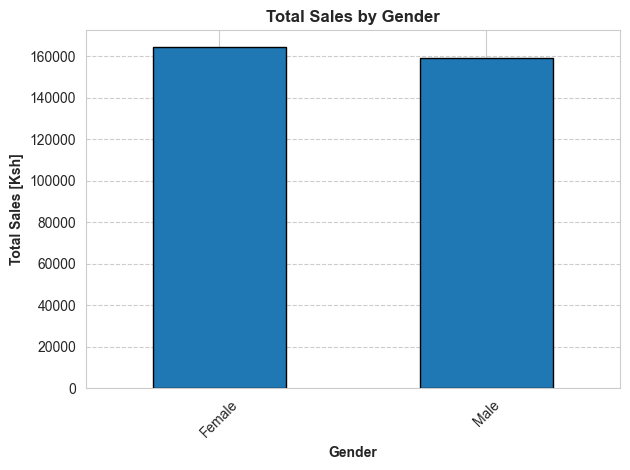

In [23]:
#Plotting Gender comparison by Revenue
sales=df.groupby("Gender")["Total Sales"].sum()
sales.plot(kind="bar",edgecolor="black")
plt.title("Total Sales by Gender",fontweight="bold")
plt.ylabel("Total Sales [Ksh]",fontweight="bold")
plt.xlabel("Gender",fontweight="bold")
plt.xticks(rotation=45)
plt.grid(axis="y",linestyle="--")
plt.tight_layout()
plt.show()

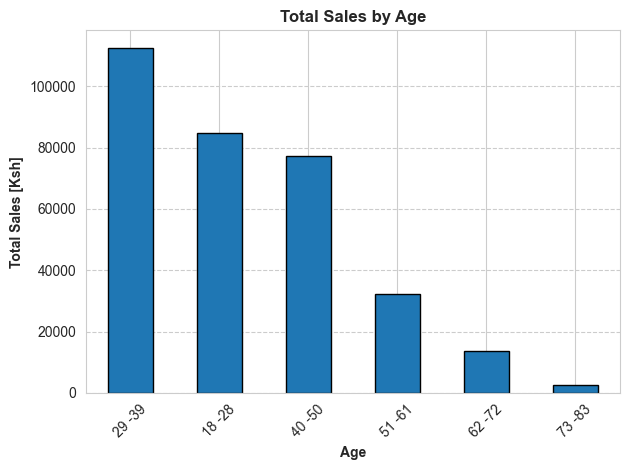

In [24]:
#Plotting Age group comparison by Revenue
sales_age=df.groupby("Age")["Total Sales"].sum().sort_values(ascending=False)
sales_age.plot(kind="bar",edgecolor="black")
plt.title("Total Sales by Age",fontweight="bold")
plt.ylabel("Total Sales [Ksh]",fontweight="bold")
plt.xlabel("Age",fontweight="bold")
plt.xticks(rotation=45)
plt.grid(axis="y",linestyle="--")
plt.tight_layout()
plt.show()

In [25]:
#Plotting Popular Category by Gender and Age
category_sales =df.groupby(["Gender","Age","Category"])["Quantity"].sum().reset_index()
top_categories = category_sales.loc[category_sales.groupby(["Gender", "Age"])["Quantity"].idxmax()]
display(top_categories.set_index("Age"))

,Gender,Category,Quantity
Age,,,
18 -28,Female,LONGLIFE MILK,95.0
29 -39,Female,LONGLIFE MILK,56.0
40 -50,Female,SCHOOL STATIONERY,93.0
51 -61,Female,BABY SKIN CARE,1.0
62 -72,Female,LONGLIFE MILK,30.0
73 -83,Female,AEROSOLS,0.0
18 -28,Male,WHEAT FLOUR,42.0
29 -39,Male,LONGLIFE MILK,91.0
40 -50,Male,SCHOOL STATIONERY,18.0


### Insights
* The sales data analysis reveals several key trends in customer purchasing behavior. A total of **147** customers generated **Ksh. 322,964** in sales, with an average basket value of **Ksh. 2,070** per customer. The best-selling items by volume were primarily dairy products such as **Mt. Kenya UHT Milk 500ML Pouch** and **Brookside Dairybest Milk 500ML**, alongside **Soko Maize Meal 2kg**, indicating a high demand for staple household products. The top three brands contributing the highest revenue were **Fresh, Mt. Kenya**, and **Haier** suggesting that consumers prefer well-established and trusted brands.

* Sales volume varied significantly across the week, with Sunday experiencing the highest sales and Saturday the lowest. This indicates that customers prefer shopping at the beginning of the week, possibly due to restocking for the coming week.

* Gender and age analysis revealed that females formed the majority of customers, with the **29-39** age group contributing the highest sales, followed by **18-28** and **40-50**. The **73-83** age group had the least sales, suggesting lower shopping activity among older individuals.

* The most popular product categories across different gender and age groups highlight interesting consumer preferences with Females in the 18-39 age group predominantly purchased Longlife Milk, while those in the 40-50 age group favored school stationery—possibly for children’s educational needs.

* Males in the 18-28 age group preferred wheat flour, while those in the 29-39 age group also showed a strong preference for Longlife Milk. Older males in the 51-61 age group leaned towards Maize Flour, while those aged 62-72 favored Fresh Milk. This indicates that dairy and staple foods are primary purchases across most customer segments.

* In terms of revenue contribution, females significantly outspent males, reaffirming their dominance in household purchasing decisions. The 29-39 age group emerged as the highest revenue generator, followed by 18-28 and 40-50, which suggests that younger and middle-aged customers are the primary market drivers.

### Recommendations
* **Stock Optimization & Promotions:** The dairy products (Longlife Milk, Fresh Milk) and staple foods (Maize and Wheat Flour) are bestsellers thus the business should ensure consistent stock availability and consider bundled promotions to encourage repeat purchases.

* **Targeted Marketing:** Given that females and the 29-39 age group generate the highest sales, marketing efforts should focus on female-centric and family-oriented promotions. Personalized discounts on school stationery and staple foods can also drive sales in this key demographic.

* **Weekend Sales Strategy:** Sunday having the highest sales and Saturday the lowest, the business can introduce Saturday-specific discounts or early weekend promotions to balance sales volume throughout the week.

* **Loyalty & Customer Retention:** The average basket value of customers is Ksh. 2,070 and introducing loyalty programs or discount vouchers for frequent shoppers could further increase spending.

* **Brand Partnerships:** For the brands like Fresh, Mt. Kenya, and Haier forming exclusive partnerships, special promotions or bulk discounts with these brands can enhance customer loyalty and drive additional revenue.
